# SEVER APP geoJSON Creation 

In [13]:
import json

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 

from shapely.geometry import Point

In [14]:
def get_geodf_(file_):
    """Retunrns a geodataframe"""
    "EU_BASINS"
    gdf = gpd.read_file(file_, ) #crs={'init': 'epsg:4326'}
    gdf = gpd.GeoDataFrame(gdf)
    return gdf


In [15]:

class AppData():

    nodes = [] # create empty list 
    dfapp = pd.DataFrame()

    with open('test.json', 'r') as f: # open json # change to read API 
        for line in f.readlines():
            nodes.append(json.loads(line)) # append lines to list 
    
    for i in range(len(nodes[0])):
        df = pd.DataFrame.from_dict(nodes[0][i]) #['flow']
        df = df.T
        dfapp = dfapp.append(df)
        
    def get_node_ids(self):
        """Get a list of nodes in the data"""
        return list(set(self.dfapp.index))
        
    def get_node_data(self, node_id):
        """Get all node data"""
        dfnode = self.dfapp.loc[self.dfapp.index == node_id]
        return dfnode
    
    def get_node_measures(self, dfnode):
        """Get node timesearies data NOTE needs to be made generic 
        - taking in a number of TS and the column names deteceted and generated programatically
        WARNING need to think more about this needs to use th node_id
        """
        dfsensorflow  = pd.DataFrame.from_dict(dfnode["flow"][0], orient = 'index', ) 
        dfsensorflow.rename({0:"Flow"}, axis= 1, inplace = True)

        dfsensorrain  = pd.DataFrame.from_dict(dfnode["rainfall"][0], orient = 'index', ) 
        dfsensorrain.rename({0:"rain"}, axis= 1, inplace = True)
       

        dfsensorupstream  = pd.DataFrame.from_dict(dfnode["upstream_flow"][0], orient = 'index', ) 
        dfsensorupstream.rename({0:"upstream"}, axis= 1, inplace = True)
       

        dfsensordownstream  = pd.DataFrame.from_dict(dfnode["downstream_flow"][0], orient = 'index', ) 
        dfsensordownstream.rename({0:"downstream"}, axis= 1, inplace = True)
        

        dfappmeasures =  pd.concat([dfsensorflow, 
                                    dfsensorrain, 
                                    dfsensorupstream, 
                                    dfsensordownstream ], axis = 1)
        
        return dfappmeasures
    
    def get_actionable_insight(self):
        """creates a dummy actionable insights"""
        
        cols = ['Priority', 'Node ID', 'Location', 'Probability', 'When']


        data = [['High', i, "wesex", p, w] for i, p, w in zip(dfapp.sample(n=20).index,
                                            np.random.randint(low=1, high=100, size=20), 
                                            np.random.randint(low=-10, high=20, size=20)
                                            )]

        dfaction = pd.DataFrame(columns = cols, data = data)
        
        return dfaction 


#data varaiables 
# should these be constructed in a seperate place? i,e in file?
sensors = AppData().get_node_ids() # all sensor nodes in the data 

# process geo data

In [16]:
leaflet_crs = "EPSG:4326"# "EPSG:3857"

# UK postcode polygons 
- will allow easy breakdown to geo levels and enhance UX

In [17]:
gdf_pc = get_geodf_("/media/hal/Data/geo/uk/postcodes/shp/PostalDistrict.shp")
#gdf_pc['geometry_point'] = [Point(xy) for xy in zip(gdf_pc.x, gdf_pc.y)]
#gdf_pc['geometry_point'] = gdf_pc['geometry_point'].to_crs(leaflet_crs)
#leaflet_crs = "EPSG:3857" # "EPSG:4326"# 
#gdf_pc.to_crs(leaflet_crs , inplace=True)


#gdf_pc['geometry_point'] = gdf_pc['geometry_point'].to_crs(leaflet_crs)
gdf_pc

DistID PostDist PostArea DistNum  PCCnt  AnomCnt    RefPC       x  \
0          1     AB10       AB      10    725        2  AB106HA  392949   
1          2     AB11       AB      11    660        1  AB115QH  394404   
2          3     AB12       AB      12    704        0  AB123LL  393407   
3          4     AB13       AB      13     73        0  AB130EH  385705   
4          5     AB14       AB      14    142        0  AB140LA  383616   
...      ...      ...      ...     ...    ...      ...      ...     ...   
2731    2732      YO7       YO       7    878        0   YO71SB  442456   
2732    2733      YO8       YO       8   1209        0   YO88AG  461987   
2733    2734      ZE1       ZE       1    319        0   ZE10RF  446175   
2734    2735      ZE2       ZE       2    303        1   ZE29PX  440489   
2735    2736      ZE3       ZE       3     12        0   ZE39JL  438888   

            y       Sprawl Locale  \
0      805109     Aberdeen   None   
1      805438     Aberdeen   None   
2      800946     Aberdeen   None   
3      801808   Milltimber   None   
4      801140  Peterculter   None   
...       ...          ...    ...   
2731   481266       Thirsk   None   
2732   432038        Selby   None   
2733  1140943      Lerwick   None   
2734  1162938         Brae   None   
2735  1111459   Hestingott   None   

                                               geometry  
0     POLYGON ((392500.960 805927.935, 392536.991 80...  
1     MULTIPOLYGON (((397283.458 805385.540, 397279....  
2     MULTIPOLYGON (((381763.351 798479.977, 382316....  
3     POLYGON ((384002.001 803896.026, 384112.006 80...  
4     POLYGON ((378503.427 802871.010, 378631.753 80...  
...                                                 ...  
2731  POLYGON ((435311.453 485611.354, 435292.193 48...  
2732  POLYGON ((455787.576 434833.140, 455761.645 43...  
2733  MULTIPOLYGON (((439144.961 1142076.953, 439999...  
2734  MULTIPOLYGON (((452501.127 1173299.466, 452500...  
2735  MULTIPOLYGON (((438250.966 1112633.001, 438738...  

[2736 rows x 12 columns]

In [18]:
gdf_pc.crs

<Projected CRS: PROJCS["Transverse_Mercator",GEOGCS["GCS_Airy 1830 ...>
Name: Transverse_Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: unknown
- Ellipsoid: airy
- Prime Meridian: Greenwich

In [19]:
test = gdf_pc[["geometry", "PostDist"]].copy() #to_file('gdf_area.geojson', driver='GeoJSON') 
test = test.loc[test["PostDist"] == "AB10" ]
test.to_file('test.geojson', driver='GeoJSON') 

# Get the sensor level data 

In [20]:

dfapp = AppData().dfapp # dfapp all node data 


In [21]:
dfapp 

down_stream                                    downstream_flow  \
14002       14428                                               None   
14428         WRC                                               None   
14531       16790                                               None   
14624         WRC                                               None   
15524       16772  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
...           ...                                                ...   
17589       16017  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
19538       16083  {'2017-04-01 00:00:00': 0.0761109441518783, '2...   
19703       16110  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
19704       16017  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
WRC             0                                               None   

                                                    flow inflow        lat  \
14002  {'2017-04-01 00:00:00': 7.631663060188292, '20...    1.0  51.383448   
14428                                               None    0.0  51.388431   
14531                                               None    0.0  51.356871   
14624  {'2017-04-01 00:00:00': 30.588802210489906, '2...    0.0  51.405042   
15524                                               None    1.0  51.405042   
...                                                  ...    ...        ...   
17589  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...    1.0  51.376804   
19538  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...    0.0  51.396737   
19703  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...    1.0  51.360193   
19704  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...    1.0  51.381787   
WRC                                                 None    0.0  51.405042   

            lon                                           rainfall  \
14002 -2.374309  {'2017-04-01 00:00:00': 7.631663060188292, '20...   
14428 -2.434416                                               None   
14531 -2.339961                                               None   
14624 -2.447297  {'2017-04-01 00:00:00': 30.588802210489906, '2...   
15524 -2.327081                                               None   
...         ...                                                ...   
17589 -2.382895  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
19538 -2.335668  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
19703 -2.370015  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
19704 -2.382895  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
WRC   -2.440857                                               None   

      spill_level_mm storm_tank                  type up_stream  \
14002            NaN        0.0                   CSO     17526   
14428            NaN        0.0        PumpingStation     14002   
14531            NaN        0.0        PumpingStation     16788   
14624            NaN        0.0                   CSO     16762   
15524            NaN        0.0        PumpingStation     16757   
...              ...        ...                   ...       ...   
17589          195.0        0.0                   CSO     16125   
19538          430.0        0.0                   CSO     16772   
19703          150.0        0.0                   CSO       NaN   
19704         1310.0        0.0                   CSO     16059   
WRC              NaN        0.0  WaterRecyclingCentre     14624   

                                           upstream_flow  
14002  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...  
14428  {'2017-04-01 00:00:00': 7.631663060188292, '20...  
14531  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...  
14624  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...  
15524  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...  
...                                                  ...  
17589  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...  
19538  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...  
19703                      

In [22]:
dfapp .loc[dfapp .index == "WRC", 'down_stream'] = None 

In [23]:
dfapp.value_counts("type")

type
CSO                     81
NoDataCSO                8
PumpingStation           4
WaterRecyclingCentre     1
dtype: int64

In [24]:
gdf = gpd.GeoDataFrame(dfapp, geometry=gpd.points_from_xy( dfapp.lon, dfapp.lat))

#.to_crs(leaflet_crs, inplace=True)

gdf.set_crs(leaflet_crs, inplace=True) # is it leaflet_crs?
#gdf.to_crs(leaflet_crs, inplace=True)
gdf.crs 


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
gdf

down_stream                                    downstream_flow  \
14002       14428                                               None   
14428         WRC                                               None   
14531       16790                                               None   
14624         WRC                                               None   
15524       16772  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
...           ...                                                ...   
17589       16017  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
19538       16083  {'2017-04-01 00:00:00': 0.0761109441518783, '2...   
19703       16110  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
19704       16017  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
WRC          None                                               None   

                                                    flow inflow        lat  \
14002  {'2017-04-01 00:00:00': 7.631663060188292, '20...    1.0  51.383448   
14428                                               None    0.0  51.388431   
14531                                               None    0.0  51.356871   
14624  {'2017-04-01 00:00:00': 30.588802210489906, '2...    0.0  51.405042   
15524                                               None    1.0  51.405042   
...                                                  ...    ...        ...   
17589  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...    1.0  51.376804   
19538  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...    0.0  51.396737   
19703  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...    1.0  51.360193   
19704  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...    1.0  51.381787   
WRC                                                 None    0.0  51.405042   

            lon                                           rainfall  \
14002 -2.374309  {'2017-04-01 00:00:00': 7.631663060188292, '20...   
14428 -2.434416                                               None   
14531 -2.339961                                               None   
14624 -2.447297  {'2017-04-01 00:00:00': 30.588802210489906, '2...   
15524 -2.327081                                               None   
...         ...                                                ...   
17589 -2.382895  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
19538 -2.335668  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
19703 -2.370015  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
19704 -2.382895  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
WRC   -2.440857                                               None   

      spill_level_mm storm_tank                  type up_stream  \
14002            NaN        0.0                   CSO     17526   
14428            NaN        0.0        PumpingStation     14002   
14531            NaN        0.0        PumpingStation     16788   
14624            NaN        0.0                   CSO     16762   
15524            NaN        0.0        PumpingStation     16757   
...              ...        ...                   ...       ...   
17589          195.0        0.0                   CSO     16125   
19538          430.0        0.0                   CSO     16772   
19703          150.0        0.0                   CSO       NaN   
19704         1310.0        0.0                   CSO     16059   
WRC              NaN        0.0  WaterRecyclingCentre     14624   

                                           upstream_flow  \
14002  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
14428  {'2017-04-01 00:00:00': 7.631663060188292, '20...   
14531  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
14624  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
15524  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
...                                                  ...   
17589  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
19538  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
19703             

In [26]:
gdf = gdf.reset_index()
gdf.rename({'index' : 'Node ID'}, axis = 1, inplace = True)

def get_html_popup(row):
    """get html of node popup"""
    
    if row['type'] == 'CSO':
        return f"""<div classname = popup >

                    <h1> Sewer Overflow Station </h1><br>

                   <div> Station ID: {row['Node ID']} <br>
                        Type: {row['type']} <br>
                        Upstream: {row['up_stream']} <br>
                        Downstream: {row['down_stream']} <br>                
                    </div>                
                    </div>

                    """
    elif row['type'] == 'NoDataCSO':
        
        return f"""<div classname = popup >

                    <h1> Offline Sewer Overflow Station </h1><br>

                   <div> Station ID: {row['Node ID']} <br>
                        Type: {row['type']} <br>
                        Upstream: {row['up_stream']} <br>
                        Downstream: {row['down_stream']} <br>                
                    </div>                
                    </div>

                    """
    elif row['type'] == 'PumpingStation':
        return f"""<div classname = popup >

                    <h1> Sewer Pumping Station </h1><br>

                   <div> Station ID: {row['Node ID']} <br>
                        Type: {row['type']} <br>
                        Upstream: {row['up_stream']} <br>
                        Downstream: {row['down_stream']} <br>                
                    </div>                
                    </div>

                    """
        
    elif row['type'] == 'WaterRecyclingCentre':
        return f"""<div classname = popup >

                    <h1> Water Recycling Center </h1><br>

                   <div> Station ID: {row['Node ID']} <br>
                        Type: {row['type']} <br>
                        Upstream: {row['up_stream']} <br>
                        Downstream: {row['down_stream']} <br>                
                    </div>                
                    </div>

                    """
        
    else:
        print(f"Node type {row['type']} not found")
        return 
        


gdf['popup'] =  gdf.apply(get_html_popup, axis = 1) 

In [27]:
class HalGeoDataEnrichment():
    """class of fucntions to work on geodata"""
    
    def __init__(self, gdf : gpd.GeoDataFrame):
        """Initalise connection requires path to config file"""
        
        self.gdf = gdf
    
    
    def geojson_nodes_by_type(self):
        """takes the client dataframe and splits by node type"""
        
        node_types = ['CSO', 'NoDataCSO', 'PumpingStation', 'WaterRecyclingCentre']
        
        def get_subset_gdf(gdf : gpd.GeoDataFrame, node_type) ->  gpd.GeoDataFrame:
            """subsets data based on node type"""
            return gdf.loc[gdf['type'] == node_type ].copy()
        
        def save_geojsons(gdfsdict : dict ) -> None:
            cols = ['Node ID', 'geometry', 'type', 'popup',  ]
            for k, v in gdfsdict.items():
                v[cols].to_file(f'{k}.geojson', driver='GeoJSON' )       
            
        gdfs = { k : get_subset_gdf(gdf, node_type = k ) for k in node_types }
        
        save_geojsons(gdfsdict = gdfs )
        
    
    
    
    

In [28]:
creategeojsons = HalGeoDataEnrichment(gdf = gdf)
creategeojsons.geojson_nodes_by_type()

In [29]:
def geojson_nodes_by_type():
    """takes the client dataframe and splits by node type"""
    

In [30]:
cols = ['Node ID', 'geometry', 'type', 'popup',  ]

gdf[cols].to_file('testsations2.geojson', driver='GeoJSON' )

In [31]:
gdf[cols]

Node ID                   geometry                  type  \
0    14002  POINT (-2.37431 51.38345)                   CSO   
1    14428  POINT (-2.43442 51.38843)        PumpingStation   
2    14531  POINT (-2.33996 51.35687)        PumpingStation   
3    14624  POINT (-2.44730 51.40504)                   CSO   
4    15524  POINT (-2.32708 51.40504)        PumpingStation   
..     ...                        ...                   ...   
89   17589  POINT (-2.38290 51.37680)                   CSO   
90   19538  POINT (-2.33567 51.39674)                   CSO   
91   19703  POINT (-2.37002 51.36019)                   CSO   
92   19704  POINT (-2.38290 51.38179)                   CSO   
93     WRC  POINT (-2.44086 51.40504)  WaterRecyclingCentre   

                                                popup  
0   <div classname = popup >\n\n                  ...  
1   <div classname = popup >\n\n                  ...  
2   <div classname = popup >\n\n                  ...  
3   <div classname = popup >\n\n                  ...  
4   <div classname = popup >\n\n                  ...  
..                                                ...  
89  <div classname = popup >\n\n                  ...  
90  <div classname = popup >\n\n                  ...  
91  <div classname = popup >\n\n                  ...  
92  <div classname = popup >\n\n                  ...  
93  <div classname = popup >\n\n                  ...  

[94 rows x 4 columns]

In [32]:
list(gdf)

['Node ID',
 'down_stream',
 'downstream_flow',
 'flow',
 'inflow',
 'lat',
 'lon',
 'rainfall',
 'spill_level_mm',
 'storm_tank',
 'type',
 'up_stream',
 'upstream_flow',
 'geometry',
 'popup']

In [33]:
gdf

Node ID down_stream                                    downstream_flow  \
0    14002       14428                                               None   
1    14428         WRC                                               None   
2    14531       16790                                               None   
3    14624         WRC                                               None   
4    15524       16772  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
..     ...         ...                                                ...   
89   17589       16017  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
90   19538       16083  {'2017-04-01 00:00:00': 0.0761109441518783, '2...   
91   19703       16110  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
92   19704       16017  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
93     WRC        None                                               None   

                                                 flow inflow        lat  \
0   {'2017-04-01 00:00:00': 7.631663060188292, '20...    1.0  51.383448   
1                                                None    0.0  51.388431   
2                                                None    0.0  51.356871   
3   {'2017-04-01 00:00:00': 30.588802210489906, '2...    0.0  51.405042   
4                                                None    1.0  51.405042   
..                                                ...    ...        ...   
89  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...    1.0  51.376804   
90  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...    0.0  51.396737   
91  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...    1.0  51.360193   
92  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...    1.0  51.381787   
93                                               None    0.0  51.405042   

         lon                                           rainfall  \
0  -2.374309  {'2017-04-01 00:00:00': 7.631663060188292, '20...   
1  -2.434416                                               None   
2  -2.339961                                               None   
3  -2.447297  {'2017-04-01 00:00:00': 30.588802210489906, '2...   
4  -2.327081                                               None   
..       ...                                                ...   
89 -2.382895  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
90 -2.335668  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
91 -2.370015  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
92 -2.382895  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
93 -2.440857                                               None   

   spill_level_mm storm_tank                  type up_stream  \
0             NaN        0.0                   CSO     17526   
1             NaN        0.0        PumpingStation     14002   
2             NaN        0.0        PumpingStation     16788   
3             NaN        0.0                   CSO     16762   
4             NaN        0.0        PumpingStation     16757   
..            ...        ...                   ...       ...   
89          195.0        0.0                   CSO     16125   
90          430.0        0.0                   CSO     16772   
91          150.0        0.0                   CSO       NaN   
92         1310.0        0.0                   CSO     16059   
93            NaN        0.0  WaterRecyclingCentre     14624   

                                        upstream_flow  \
0   {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
1   {'2017-04-01 00:00:00': 7.631663060188292, '20...   
2   {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
3   {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
4   {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
..                                                ...   
89  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
90  {'2017-04-01 00:00:00': nan, '2017-04-01 01:00...   
91                                               None   
92  {'2017-04-01 00:00:00': nan, 

In [34]:
nodesdf = gdf[["geometry"]].copy()
nodesdf.reset_index(inplace = True)
nodesdf.rename({'index': 'Node ID'}, axis =1, inplace = True)
nodesdf 

Node ID                   geometry
0         0  POINT (-2.37431 51.38345)
1         1  POINT (-2.43442 51.38843)
2         2  POINT (-2.33996 51.35687)
3         3  POINT (-2.44730 51.40504)
4         4  POINT (-2.32708 51.40504)
..      ...                        ...
89       89  POINT (-2.38290 51.37680)
90       90  POINT (-2.33567 51.39674)
91       91  POINT (-2.37002 51.36019)
92       92  POINT (-2.38290 51.38179)
93       93  POINT (-2.44086 51.40504)

[94 rows x 2 columns]

In [35]:
nodesdf.to_file('testsations.geojson', driver='GeoJSON' )

<AxesSubplot:>

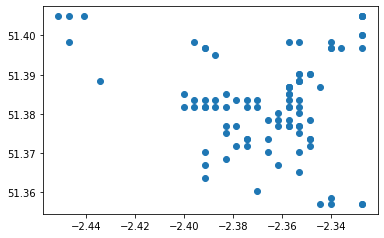

In [36]:
gdf.plot()

In [37]:
pd.set_option('display.max_rows', 100)

In [38]:
gdf['lon'].max()

-2.327081

In [39]:
gdf_area = gpd.sjoin(gdf_pc, gdf, how='inner', op= 'intersects', 
          lsuffix='left', rsuffix='right') #.to_file("uk_river_basins.geojson", driver='GeoJSON')
gdf_area

<ipython-input-39-becd39cb63cc>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: PROJCS["Transverse_Mercator",GEOGCS["GCS_Airy 1830 ...
Right CRS: EPSG:4326

  gdf_area = gpd.sjoin(gdf_pc, gdf, how='inner', op= 'intersects',


Empty GeoDataFrame
Columns: [DistID, PostDist, PostArea, DistNum, PCCnt, AnomCnt, RefPC, x, y, Sprawl, Locale, geometry, index_right, Node ID, down_stream, downstream_flow, flow, inflow, lat, lon, rainfall, spill_level_mm, storm_tank, type, up_stream, upstream_flow, popup]
Index: []

[0 rows x 27 columns]

In [40]:
list(gdf_area)

['DistID',
 'PostDist',
 'PostArea',
 'DistNum',
 'PCCnt',
 'AnomCnt',
 'RefPC',
 'x',
 'y',
 'Sprawl',
 'Locale',
 'geometry',
 'index_right',
 'Node ID',
 'down_stream',
 'downstream_flow',
 'flow',
 'inflow',
 'lat',
 'lon',
 'rainfall',
 'spill_level_mm',
 'storm_tank',
 'type',
 'up_stream',
 'upstream_flow',
 'popup']

In [41]:
gdf_area

Empty GeoDataFrame
Columns: [DistID, PostDist, PostArea, DistNum, PCCnt, AnomCnt, RefPC, x, y, Sprawl, Locale, geometry, index_right, Node ID, down_stream, downstream_flow, flow, inflow, lat, lon, rainfall, spill_level_mm, storm_tank, type, up_stream, upstream_flow, popup]
Index: []

[0 rows x 27 columns]

In [42]:
gdf_area = gdf_area[[#'index_right',
                     'PostDist',
                     'PostArea',
                     'Sprawl',
                    'geometry',] 
                    ].copy()
#gdf_area.rename({'index_right': 'Node ID'}, inplace= True,  axis = 1)
gdf_area.drop_duplicates(inplace= True)
gdf_area.reset_index(inplace = True)
gdf_area.drop('index', axis = 1, inplace = True)
gdf_area

Empty GeoDataFrame
Columns: [PostDist, PostArea, Sprawl, geometry]
Index: []

NameError: name 'testpoly' is not defined

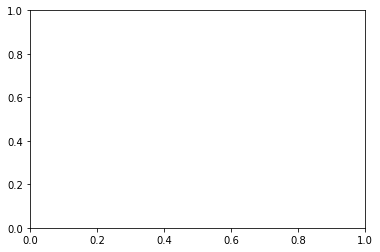

In [43]:
fig, ax = plt.subplots()

testpoly.plot(ax = ax, color='white', edgecolor='black')

gdf.plot(ax = ax, )

In [44]:
gdf_area.to_crs("EPSG:4326", inplace=True)
gdf_area.to_file('gdf_area.geojson', driver='GeoJSON') 

ValueError: Cannot write empty DataFrame to file.

In [45]:
geojson_area gdf.to_file('gdf_sewers.geojson', driver='GeoJSON') 

SyntaxError: invalid syntax (<ipython-input-45-bc5ee0726a8c>, line 1)

In [46]:
gdf_area.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [47]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Get Polygons of districts 

In [48]:
def get_geodf_(file_):
    """Retunrns a geodataframe"""
    "EU_BASINS"
    gdf = gpd.read_file(file_, ) #crs={'init': 'epsg:4326'}
    gdf = gpd.GeoDataFrame(gdf)
    return gdf

gdf_pc = get_geodf_("/media/hal/Data/geo/uk/postcodes/shp/PostalDistrict.shp")
testpoly = gdf_pc.loc[gdf_pc["Sprawl"].isin(["Bath", "Keynsham"])].copy()
testpoly.to_file('testpolygons.geojson', driver='GeoJSON' )

In [49]:
gdf_pc = get_geodf_("/media/hal/Data/geo/uk/postcodes/shp/PostalDistrict.shp")

In [50]:
testpoly = gdf_pc.loc[gdf_pc["Sprawl"].isin(["Bath", "Keynsham"])].copy()
testpoly

DistID PostDist PostArea DistNum  PCCnt  AnomCnt    RefPC       x  \
120     121      BA1       BA       1   1457        0   BA15QW  374965   
128     129      BA2       BA       2   2245        3   BA22NY  373745   
270     271     BS31       BS      31    625        1  BS311PD  365930   

          y    Sprawl Locale  \
120  166113      Bath   None   
128  162443      Bath   None   
270  167810  Keynsham   None   

                                              geometry  
120  POLYGON ((369620.916 168402.455, 369618.615 16...  
128  POLYGON ((366430.036 164611.140, 366441.092 16...  
270  POLYGON ((362613.463 169197.617, 363057.278 16...

In [51]:
leaflet_crs = "EPSG:4326"# "EPSG:3857"
testpoly.to_crs(leaflet_crs, inplace=True)

In [52]:
testpoly

DistID PostDist PostArea DistNum  PCCnt  AnomCnt    RefPC       x  \
120     121      BA1       BA       1   1457        0   BA15QW  374965   
128     129      BA2       BA       2   2245        3   BA22NY  373745   
270     271     BS31       BS      31    625        1  BS311PD  365930   

          y    Sprawl Locale  \
120  166113      Bath   None   
128  162443      Bath   None   
270  167810  Keynsham   None   

                                              geometry  
120  POLYGON ((-2.43687 51.41333, -2.43691 51.41344...  
128  POLYGON ((-2.48240 51.37906, -2.48224 51.37897...  
270  POLYGON ((-2.53773 51.42006, -2.53140 51.42465...

In [53]:
testpoly.to_file('testpolygons.geojson', driver='GeoJSON' )

<AxesSubplot:>

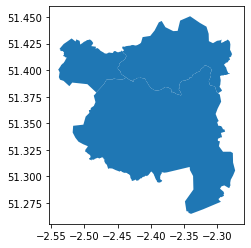

In [54]:
testpoly.plot()

# Get connectivity 

In [55]:
df = mongo.get_dataframe(collection = 'WESSEX_Site_Info')

NameError: name 'mongo' is not defined

In [ ]:
60000*0.7